In [89]:
import numpy as np
import matplotlib.pyplot as plt


In [144]:
L = 14
N = 100
Rho = 3
Mu = 0.2

B = 1
Gamma = 10
Alfa = 2
R = 7
P = 0.5

Delta = 4
A = L- Delta
J = 2

In [173]:
#initialize n lists of bits (genomes) in an array
def init_population():
    return [np.random.randint(0,2, size = L) for i in range(N)]

#pop is array of individual lists of bits (genomes)
def phenotypes(pop):
    return np.sum(pop, axis = 1)

#a and b are two parents
def uniform_recombination(a, b):
    option = list(zip(a,b))
    return [option[i][np.random.randint(0,2)] for i in range(len(a))]

#at probability mu, flip a bit at a random position of the individual
def mutate(individual):
    if np.random.uniform(0,1) < Mu:
        
        index = np.random.randint(0, L)
        v = individual[index]
        
        if v == 1:
            individual[index] = 0
        else: 
            individual[index] = 1
            
    return individual


def reproduction_mutation(pop):
    
    phenos = phenotypes(pop)
    offspring = []
    for i in range(N):

        randomparentindex = np.random.randint(0, len(pop))
        randomparent = phenos[randomparentindex]

        yindexes = [phenoindex for phenoindex, pheno in enumerate(phenos) if np.abs(pheno - randomparent) <= Delta]
        yindexes.remove(randomparentindex)

        secondparentindex = yindexes[np.random.randint(0, len(yindexes))]
        single_offspring = mutate(uniform_recombination(pop[randomparentindex], pop[secondparentindex]))
        #recombination + mutation

        offspring.append(single_offspring)

    return offspring

def fitness(x, yzip):
    h0 = np.exp(-((x / Gamma)**B) / B)
    h = h0 - J * np.sum(p * np.exp(- np.abs((x - y)/ R)**A) / A for p, y in yzip)
    return np.exp(h)

def compute_A(offspring):
    phenos_offspring = phenotypes(offspring)
    unique_phenos, n_xt = np.unique(phenos_offspring, return_counts=True)
    p_xt = n_xt/N

    alist = []
    for i,x in enumerate(unique_phenos):

        yzip = [[index,u] for index, u in enumerate(unique_phenos) if np.abs(x-u) >= R]
        alist.append(fitness(x, yzip))
    amean = np.mean(alist)
    avalues = zip(unique_phenos, np.array(alist)/amean)
    return {a: b for a,b in avalues}

def model_cycle(pop):
    
    offspring = reproduction_mutation(pop)
    
    nextgen = []
    a_dict = compute_A(offspring)

    while len(nextgen) < N:
        
        trial = offspring[np.random.randint(0, N)]
        pheno_trial = np.sum(trial)

        if np.random.uniform(0,1) < a_dict[pheno_trial]:
            nextgen.append(trial)
    
    return nextgen

In [ ]:
Population = init_population()


tau = 10000

delta = 3000
mu0 = 1/10
muinf = 10**-6

speciation = []

for t in range(30000):
    
    #evolve new population
    Mu = (mu0 - muinf)*(1 - np.tanh((t-tau)/delta))/2 + muinf
    Population = model_cycle(Population)
    
    if not t%1000:
        unique_phenos, n_xt = np.unique(phenotypes(Population), return_counts=True)
        p_xt = n_xt/N
        speciation.append(list(zip(unique_phenos, p_xt)))
        print(speciation[-1])

/home/maarten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


[(3, 0.01), (4, 0.08), (5, 0.13), (6, 0.17), (7, 0.22), (8, 0.18), (9, 0.11), (10, 0.06), (11, 0.01), (12, 0.03)]
[(1, 0.07), (2, 0.19), (3, 0.3), (4, 0.32), (5, 0.06), (6, 0.05), (7, 0.01)]
[(2, 0.02), (3, 0.08), (4, 0.12), (5, 0.28), (6, 0.31), (7, 0.16), (8, 0.03)]
[(3, 0.13), (4, 0.2), (5, 0.3), (6, 0.22), (7, 0.13), (9, 0.02)]
[(3, 0.06), (4, 0.12), (5, 0.43), (6, 0.14), (7, 0.14), (8, 0.09), (9, 0.02)]
[(3, 0.13), (4, 0.3), (5, 0.22), (6, 0.19), (7, 0.13), (8, 0.03)]
[(1, 0.05), (2, 0.1), (3, 0.27), (4, 0.25), (5, 0.2), (6, 0.08), (7, 0.01), (8, 0.04)]
[(1, 0.09), (2, 0.2), (3, 0.31), (4, 0.25), (5, 0.13), (6, 0.02)]
[(2, 0.01), (3, 0.12), (4, 0.2), (5, 0.43), (6, 0.12), (7, 0.07), (8, 0.05)]
[(2, 0.06), (3, 0.3), (4, 0.27), (5, 0.2), (6, 0.12), (7, 0.02), (8, 0.03)]
[(3, 0.16), (4, 0.35), (5, 0.33), (6, 0.12), (8, 0.04)]
[(0, 0.64), (1, 0.31), (2, 0.03), (3, 0.01), (4, 0.01)]
[(2, 0.03), (3, 0.5), (4, 0.38), (5, 0.09)]
[(3, 0.94), (4, 0.06)]
[(1, 0.95), (2, 0.05)]
[(0, 0.69), (1

In [166]:
# #model implementation in the limit where rho -> infinity
# def model_cycle(pop, delta, mu, l, b, gamma, j, r, p, alpha):
    
#     np.random.shuffle(pop)
#     phenos = phenotypes(pop)
#     offspring = []    
        
#     while len(offspring) <= len(pop):
#         #select initial random parent
#         randomparentindex = np.random.randint(0, len(phenos))
#         randomparent = phenos[randomparentindex]
        
#         #select second partent randomly from neighboorhood
#         yindexes = [phenosindex for phenosindex, phe in enumerate(phenos) if np.abs(phe - randomparent) <= delta]
#         yindexes.remove(randomparentindex)
#         secondparentindex = yindexes[np.random.randint(0, len(yindexes))]
        
#         #recombination + mutation
#         single_offspring = mutate(uniform_recombination(pop[randomparentindex], pop[secondparentindex]), mu, l)
#         #compute average fitness
#         i = yindexes[0]
#         avg_fitness = np.mean([fitness(phenos[i], np.concatenate([phenos[yindexes][:i], phenos[yindexes][i:]]), b, gamma, j, r, p, alpha) for i in yindexes])
        
#         fitness_offspring = fitness(np.sum(single_offspring), phenos[yindexes],  b, gamma, j, r, p, alpha)
                             
# #         #reproduction
#         if np.random.uniform(0,1) < fitness_offspring/avg_fitness:
#             offspring.append(single_offspring)
#     return offspring                            
                            
                    

In [167]:
population = init_population()

In [168]:
phenotypes(population)

array([ 7,  6,  6,  9,  6,  6,  7,  6,  9,  8,  7,  5,  8,  8,  5,  9,  5,
        5,  6,  9, 11,  4,  6,  5,  6,  8,  6,  7,  8,  5,  6,  9,  9,  8,
        7,  6,  8,  4,  8,  8, 12,  8,  8,  6,  4,  9,  8,  7,  9,  6,  5,
        9,  8,  6,  6,  9,  4, 10,  7, 10,  9,  8,  8, 12,  9,  6,  9,  5,
       10,  4,  9,  4,  7,  6,  7,  6,  4,  5,  6,  7,  7,  5,  9,  6, 11,
        7,  7, 10, 10,  4,  9,  7,  7,  7,  8, 10,  9,  6,  5,  9])

In [169]:
Adict = {i:0 for i in range(L+1)}

print(Adict)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0}


In [174]:
Population = init_population()


tau = 10000

delta = 3000
mu0 = 1/10
muinf = 10**-6

speciation = []

for t in range(30000):
    
    #evolve new population
    Mu = (mu0 - muinf)*(1 - np.tanh((t-tau)/delta))/2 + muinf
    print(t)
    Population = model_cycle(Population)
    speciation.append(np.var(phenotypes(Population)))
    print(speciation[-1])    

0
2.3899000000000004
1
2.6556
2
2.5864
3


/home/maarten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


1.9898999999999998
4
2.1784
5
2.7371000000000003
6
2.2738999999999994
7
2.4875000000000007
8
2.07
9
1.7804
10
2.7891000000000004
11
2.1675
12
2.7298999999999993
13
3.9136
14
2.4636
15
2.3664000000000005
16
2.4275
17
2.2771
18
2.0135999999999994
19
2.1395999999999997
20
2.3935999999999997
21
2.7491
22
1.8899
23
2.4044
24
2.5771
25
2.6415999999999995
26
2.0803999999999996
27
2.4300000000000006
28
2.3099
29
2.859599999999999
30
2.7298999999999993
31
1.79
32
2.02
33
1.5675
34
1.9819
35
2.3171
36
2.4904000000000006
37
2.5044
38
2.077899999999999
39
2.0876
40
2.1736
41
1.8595999999999997
42
1.9618999999999998
43
1.4811
44
1.1344000000000003
45
1.8135999999999999
46
1.6291
47
2.2051
48
1.8015999999999996
49
1.5178999999999994
50
2.1778999999999997
51
2.7675
52
2.8819
53
2.1404
54
2.2210999999999994
55
2.4616000000000007
56
3.3300000000000005
57
3.1876000000000007
58
3.4611
59
3.057899999999999
60
2.782400000000001
61
2.2864
62
2.1323999999999996
63
2.8684
64
2.2015999999999996
65
1.6210999999

2.3131
477
2.0384
478
1.6819
479
1.7275
480
1.8596000000000001
481
2.2739000000000003
482
2.0724000000000005
483
1.1058999999999999
484
1.0699999999999998
485
1.0043999999999997
486
1.2896
487
1.6218999999999997
488
1.5283999999999998
489
1.4600000000000002
490
1.8778999999999995
491
2.0851
492
2.2196000000000002
493
1.6179
494
1.2975999999999994
495
1.1219000000000003
496
1.3796000000000004
497
1.5475
498
2.0199999999999996
499
1.5251000000000006
500
1.2059
501
1.3475000000000004
502
1.5724
503
1.7219
504
1.3976000000000002
505
1.0331000000000001
506
1.4835999999999998
507
1.1696
508
1.3275000000000003
509
1.5538999999999998
510
1.5764000000000002
511
1.1796
512
1.6815999999999998
513
1.5756000000000001
514
1.3355999999999997
515
1.5500000000000003
516
1.7504000000000008
517
1.4424000000000003
518
1.4075
519
0.9875999999999998
520
0.9219000000000002
521
0.7223999999999999
522
0.6100000000000001
523
0.7971
524
0.6570999999999999
525
1.0
526
0.5624
527
0.7379000000000002
528
0.5396
529


KeyboardInterrupt: 

In [158]:
pop = init_population(N, L)

offspring = reproduction_mutation(pop, N, 0.4, 10)
#selection


phenos_offspring = phenotypes(offspring)
unique_phenos, n_xt = numpy.unique(phenos_offspring, return_counts=True)
p_xt = n_xt/n

for i,x in enumerate(unique_phenos):
    
    
    
    dummy = [[p_xt[index],u] for index, u in enumerate(unique_phenos) if np.abs(x-u) >= r]
    py, y = zip*(dummy)
    
    print(yindex)

TypeError: init_population() takes 0 positional arguments but 2 were given

In [86]:
tau = 30

deltasmall = 10
mu0 = 1/10
muinf = 10**-6

speciation = []

for t in range(100):
    #evolve new population
    mut = (mu0 - muinf)*(1 - np.tanh((t-tau)/deltasmall))/2 + muinf
    
    population = model_cycle(population, Delta, Mu, L, Beta, Gamma, J, R, P, Alfa)
    
    speciation.append(np.var(phenotypes(population)))
    print(speciation[-1])

366.8320186528184
395.19693828495883
391.08063386055665
386.56525147928994
341.53057060231066
381.99533826700076
364.1324581821337
399.0054522497704
390.2540975436098
362.211204703488
376.86243319446197
373.77205390955663
377.1441798759
376.9659259259259
394.6560640514154
380.5414684256055
370.4568154678045
436.3741941499281
384.3438809917355
338.82024522159213
358.436523348408
387.5199653227058
379.6264179545484
380.51325255102034
337.469307632882
384.60283687943263
326.2780157075254
394.90104889902796
366.4202646968298
333.08264462809916
376.0395779965764
395.0946059992284
379.1199339088373
354.8074791914388
370.1051711718095
387.99141489960596
356.46900954000625
327.240270257763
337.4485033036484
364.5255204528853
366.90945368386446
349.9544164677267
378.03805326562343
375.3933333333333
368.3942561340383
338.60979781588526
368.6272151967672
350.42632228185596
364.0771405536146
382.84908582169254
362.662627720188
368.8943329397875
342.84349765922013
323.3875546305931
356.795794088150

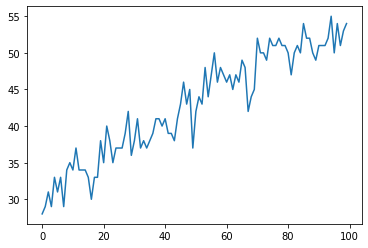

In [82]:
plt.plot(speciation)

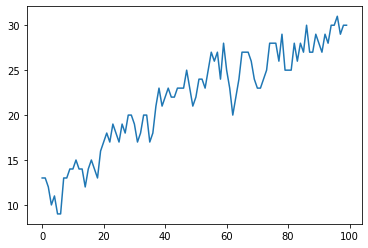

In [40]:
plt.plot(speciation)

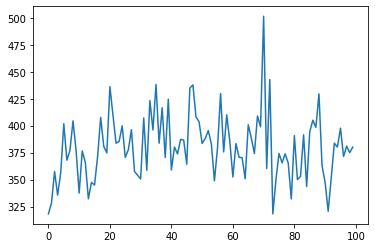

In [84]:
plt.plot(speciation)